In [28]:
import os

import pandas as pd

import eval
import matplotlib.pyplot as plt

In [29]:
os.chdir('C:/Users/johan/RustroverProjects/makespan-minimization')
measurements = eval.run()
print("ANNAHME: Alle logs beziehen sich auf die gleichen instanzen und stellen nur unterschiedliche configs dar.")


reading logfile: logs_2024-02-28_16-36-28.txt
reading logfile: logs_2024-02-28_16-37-29.txt
ANNAHME: Alle logs beziehen sich auf die gleichen instanzen und stellen nur unterschiedliche configs dar.


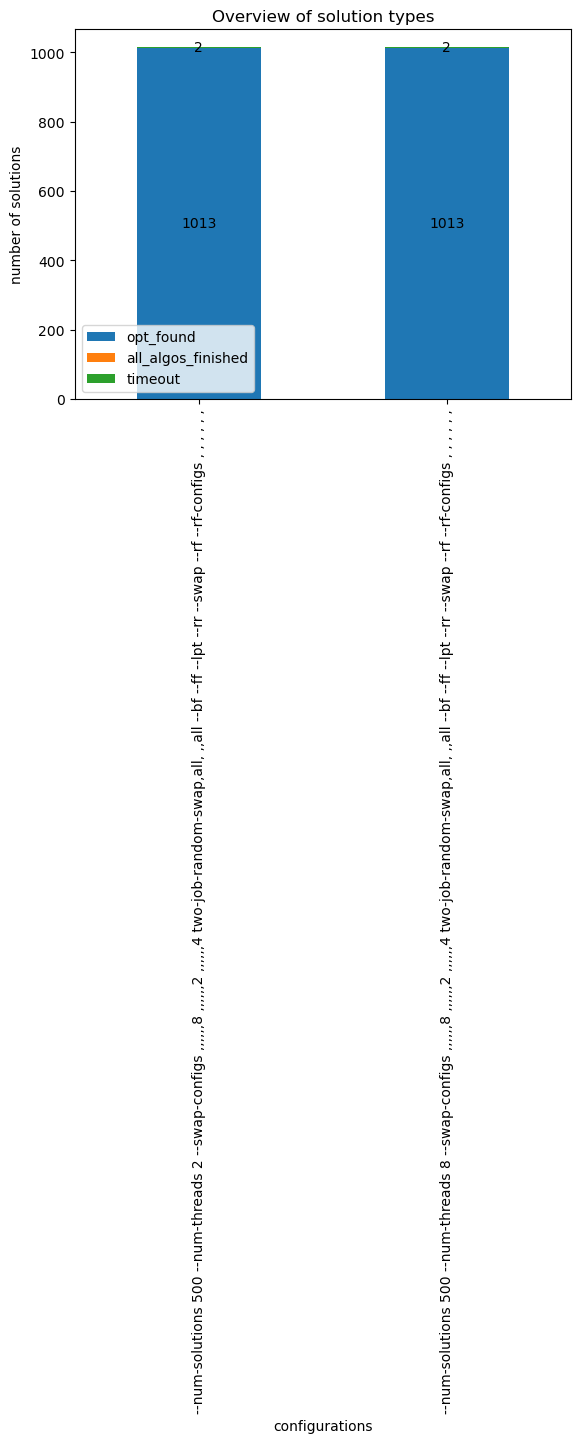

In [30]:
data = []
columns = ["opt_found", "all_algos_finished", "timeout"]
configs = []
for c_id in range(measurements.__len__()):
    (file, instances, runtime, opt_found, all_algos_finished, timeout, upper_bounds, lower_bounds, config,
     instance_names, runtimes, opt_found_per_instance) = measurements[c_id]
    data.append([opt_found, all_algos_finished, timeout])
    configs.append(config)

ax = pd.DataFrame(data, columns=columns, index=configs).plot(kind='bar', stacked=True,
                                                             title="Overview of solution types",
                                                             xlabel='configurations',
                                                             ylabel='number of solutions')

for c in ax.containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')


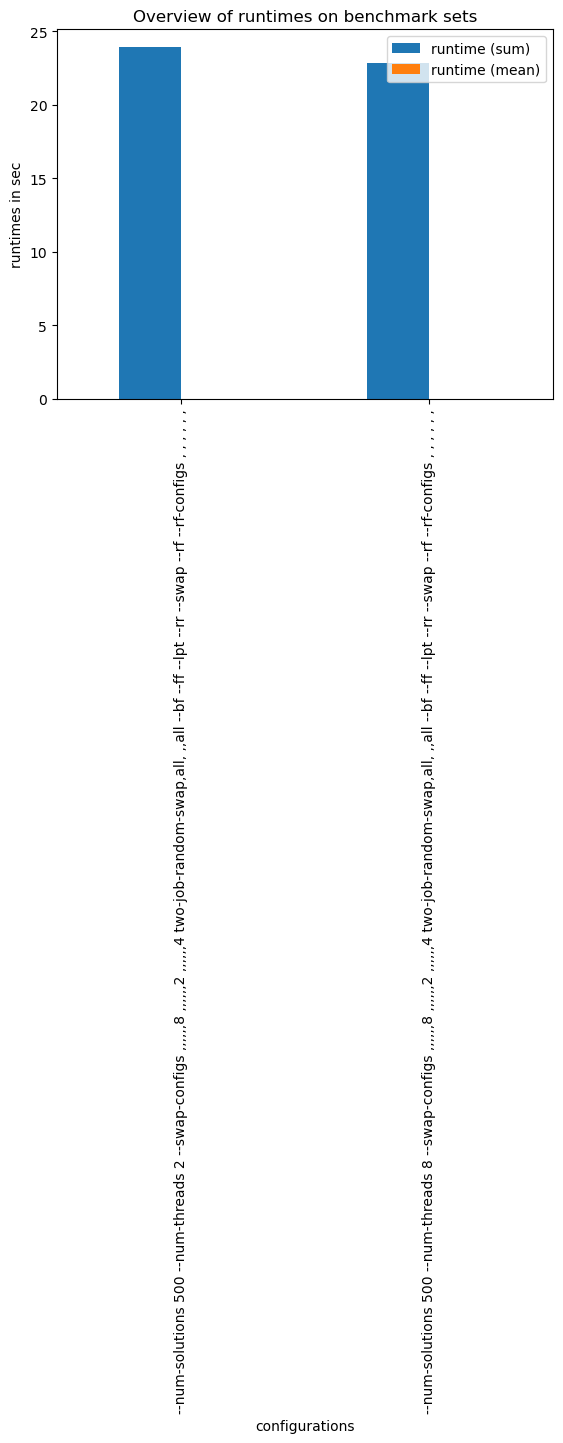

In [31]:
data = []
columns = ["runtime (sum)", "runtime (mean)"]
configs = []

for c_id in range(measurements.__len__()):
    (file, instances, runtime, opt_found, all_algos_finished, timeout, upper_bounds, lower_bounds, config,
     instance_names, runtimes, opt_found_per_instance) = measurements[c_id]
    data.append([runtime, runtime / instances])
    configs.append(config)

ax = pd.DataFrame(data, columns=columns, index=configs).plot(kind='bar',
                                                             title="Overview of runtimes on benchmark sets",
                                                             xlabel='configurations',
                                                             ylabel='runtimes in sec')

#for c in ax.containers:
#    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
#   ax.bar_label(c, labels=labels, label_type='center')


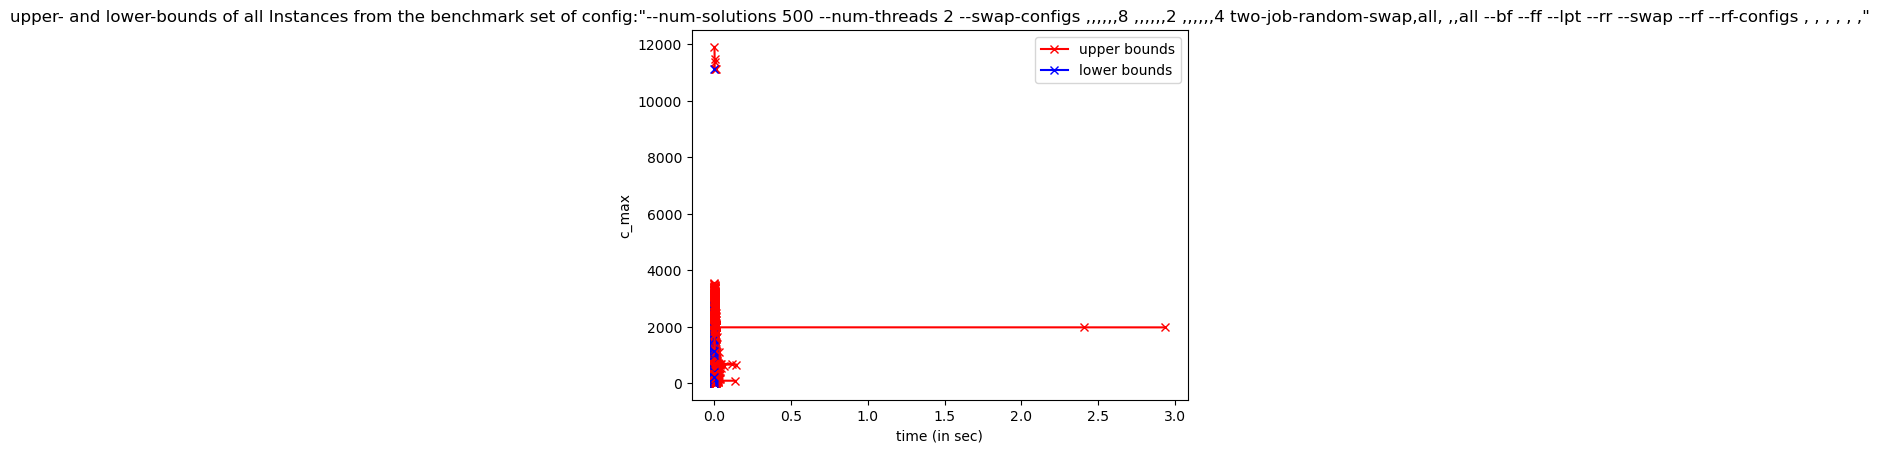

In [32]:
c_id = 0  #gerade nur für config 0 #evtl opt einzeichnen (in nächster zelle auch) + mehrere diagramm erzeugen jewils für gleich große eingeben
for i_id in range(measurements[0][1]):
    (file, instances, runtime, opt_found, all_algos_finished, timeout, upper_bounds, lower_bounds, config,
     instance_names, runtimes, opt_found_per_instance) = measurements[c_id]
    ubs_i = pd.Series(measurements[c_id][6][i_id][1], measurements[c_id][6][i_id][0]).sort_index()
    lbs_i = pd.Series(measurements[c_id][7][i_id][1], measurements[c_id][7][i_id][0]).sort_index()
    plt.plot(ubs_i, marker='x', color='red')
    plt.plot(lbs_i, marker='x', color='blue')

plt.title(f"upper- and lower-bounds of all Instances from the benchmark set of config:\"{measurements[c_id][8]}\"")
plt.ylabel('c_max')
plt.xlabel('time (in sec)')
plt.legend(['upper bounds', 'lower bounds'], loc='best')
plt.show()

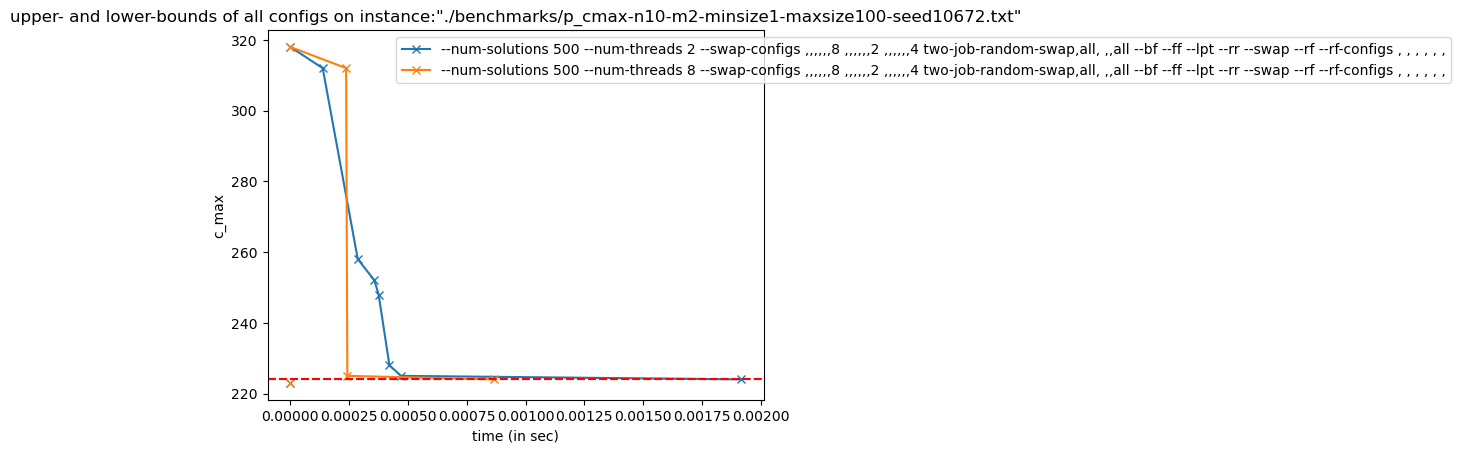

In [33]:
i_id = 1  #gerade nur für instance 0
legend = []
x = []
for c_id in range(measurements.__len__()):
    file = measurements[c_id][0]
    config = measurements[c_id][8]
    #print(config)
    ubs_i = pd.Series(measurements[c_id][6][i_id][1], measurements[c_id][6][i_id][0]).sort_index()
    lbs_i = pd.Series(measurements[c_id][7][i_id][1], measurements[c_id][7][i_id][0]).sort_index()
    n = plt.plot(ubs_i, marker='x')
    plt.plot(lbs_i, marker='x', color=n[0].get_color())

    if measurements[c_id][11][i_id]:
        plt.axhline(ubs_i.min(), linestyle='--', color='red')  #todo beschriftung an der achse

    legend.append(config)
    x.append(n[0])

plt.title(f"upper- and lower-bounds of all configs on instance:\"{measurements[c_id][9][i_id]}\"")
plt.ylabel('c_max')
plt.xlabel('time (in sec)')
plt.legend(x, legend, loc=1, bbox_to_anchor=(2.4, 1))
plt.show()


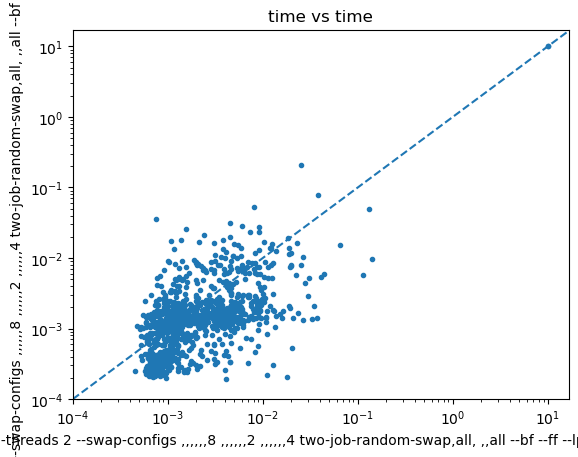

In [34]:
c_id1 = 0
c_id2 = 1

plt.scatter(measurements[c_id1][10], measurements[c_id2][10], marker='.')
plt.xscale('log')
plt.yscale('log')

plt.title(f"time vs time")
plt.ylabel(f"time of \"{measurements[c_id2][8]}\" (in sec)")
plt.xlabel(f"time of \"{measurements[c_id1][8]}\" (in sec)")

plt.axline((0.001, 0.001), (0, 0), linestyle='--')

plt.xlim(left=0.0001)
plt.ylim(bottom=0.0001)

plt.show()

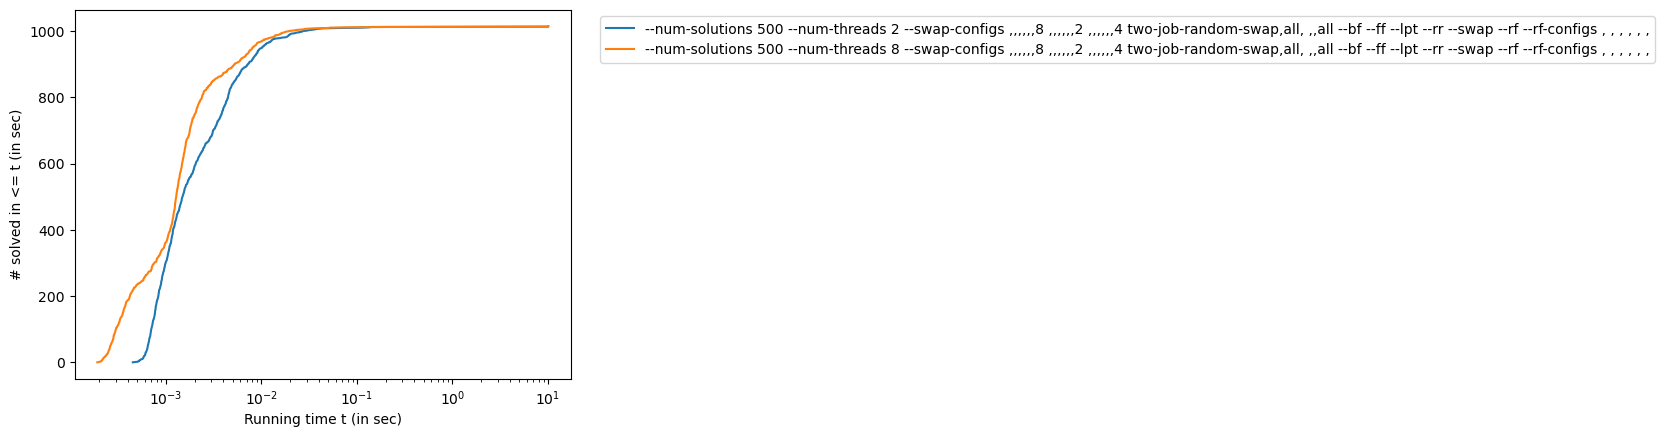

In [36]:

legend = []

for c_id in range(measurements.__len__()):
    config = measurements[c_id][8]
    runtimes = measurements[c_id][10]
    runtimes.sort()
    n = plt.plot(pd.Series(range(runtimes.__len__()), runtimes))

    legend.append(config)

plt.legend(legend, loc=1, bbox_to_anchor=(3.2, 1))

plt.xscale('log')

plt.ylabel(f"# solved in <= t (in sec)")
plt.xlabel(f"Running time t (in sec)")

plt.show()